In [6]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('/content/drive/MyDrive/ML tutorials/Feature Engineering/outlier/bhp.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

No presence of **null** values in the dataset.

In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


From the summary statistics, it can be seen that the **price_per_sqft** feature has some extreme values in its range. We use boxplot to further examine this feature itself and mark it as potential outlier if necessary.

<Axes: >

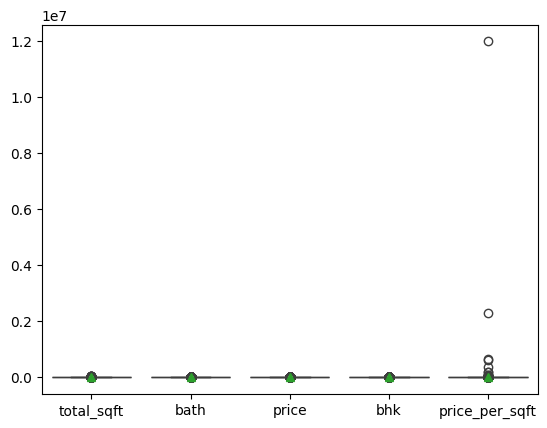

In [12]:
sns.boxplot(data=df,showmeans=True)

Hence the boxplot shows presence of outliers in the **price_per_sqft** column and our assumption is correct

In order to tackle outliers, we find the minimum and maximum thresholds of the feature using Quantile

In [13]:
min_threshold,max_threshold=df['price_per_sqft'].quantile([0.001,0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

#### **Min_Threshold = 1366.184** denotes the lower limit of the feature's range, i.e. any value below this will be considered as an outlier and removed from the dataset.
#### **Max_Threshold = 50959.362** denotes the upper limit of the feature's range, i.e. any value above this will be considered as an outlier and removed ftom the dataset.

In [14]:
df[df['price_per_sqft'] < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [15]:
df[df['price_per_sqft'] > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


Thus, creating a new dataset without the outliers

In [17]:
new_df = df[(df['price_per_sqft'] < max_threshold) & (df['price_per_sqft'] > min_threshold)]
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [18]:
new_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


Summary Statistics of the new dataset shows normal behaviour of features. We'll confirm this again by plotting the boxplot

<Axes: >

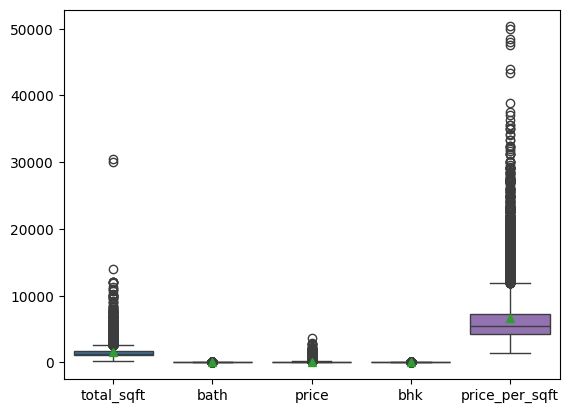

In [19]:
sns.boxplot(data=new_df,showmeans=True)

Most of the outliers are gone but the **total_sqft** column has a few outliers present in them

#### Now in our dataset, both the variables **size** and **bhk** represent the same thing, hence we drop the **size** column (because it's also categorical in nature)

In [41]:
X=new_df.drop(['location','price','size'],axis='columns')
y=new_df[['price']]

In [27]:
X

,total_sqft,bath,bhk,price_per_sqft
0,1056.0,2.0,2,3699
1,2600.0,5.0,4,4615
2,1440.0,2.0,3,4305
3,1521.0,3.0,3,6245
4,1200.0,2.0,2,4250
...,...,...,...,...
13195,3453.0,4.0,5,6689
13196,3600.0,5.0,4,11111
13197,1141.0,2.0,2,5258
13198,4689.0,4.0,4,10407


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.49826029, -0.51616527, -0.61936528, -0.71595061],
       [ 1.09828687,  1.72770565,  0.92972415, -0.49474071],
       [-0.10119157, -0.51616527,  0.15517943, -0.56960432],
       ...,
       [-0.41036747, -0.51616527, -0.61936528, -0.33945908],
       [ 3.25838208,  0.97974868,  0.92972415,  0.90400137],
       [-1.02148106, -1.26412224, -1.39391   , -0.86302138]])

In [42]:
y_scaled=scaler.transform(y)
y_scaled

array([[-0.49075557],
       [ 0.05177854],
       [-0.33703869],
       ...,
       [-0.35044618],
       [ 2.51875682],
       [-0.63870723]])

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [49]:
lr=RandomizedSearchCV(LinearRegression(),{},cv=5,n_iter=2,return_train_score=False)

eln=RandomizedSearchCV(ElasticNet(),{
    'alpha':[0.01,0.1,1,10,100],
    'l1_ratio':[0.1,0.5,0.7,0.9]
},cv=5,n_iter=2,return_train_score=False)

lasso=RandomizedSearchCV(Lasso(),{
    'alpha':[0.01,0.1,1,10,100]
},cv=5,n_iter=2,return_train_score=False)

ridge=RandomizedSearchCV(Ridge(),{
    'alpha':[0.01,0.1,1,10,100]
},cv=5,n_iter=2,return_train_score=False)

dt=RandomizedSearchCV(DecisionTreeRegressor(),{
    'criterion':["squared_error", "friedman_mse", "absolute_error"],
    'max_leaf_nodes':[10,20,50,100]
},cv=5,n_iter=2,return_train_score=False)

rf=RandomizedSearchCV(RandomForestRegressor(),{
    'n_estimators':[100,200,500],
    'criterion':["squared_error", "friedman_mse", "absolute_error"]
},cv=5,n_iter=2,return_train_score=False)

adb=RandomizedSearchCV(AdaBoostRegressor(),{
    'n_estimators':[100,200,500],
    'learning_rate':[0.001,0.01,0.05,0.1],
    'loss':['linear', 'square', 'exponential']
},cv=5,n_iter=2,return_train_score=False)

gb=RandomizedSearchCV(GradientBoostingRegressor(),{
    'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators':[100,200,500],
    'learning_rate':[0.001,0.01,0.05,0.1],
    'criterion':['friedman_mse', 'squared_error']
},cv=5,n_iter=2,return_train_score=False)

svr=RandomizedSearchCV(SVR(gamma='auto'),{
    'C':[1,10,20,50],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
},cv=5,n_iter=2,return_train_score=False)

knn=RandomizedSearchCV(KNeighborsRegressor(),{
    'n_neighbors':[5,10,25,50],
    'algorithm':['auto'],
    'weights':['uniform','distance']
},cv=5,n_iter=2,return_train_score=False)

In [50]:
lr.fit(X_scaled,y_scaled)
eln.fit(X_scaled,y_scaled)
lasso.fit(X_scaled,y_scaled)
ridge.fit(X_scaled,y_scaled)
dt.fit(X_scaled,y_scaled)
rf.fit(X_scaled,y_scaled)
adb.fit(X_scaled,y_scaled)
gb.fit(X_scaled,y_scaled)
svr.fit(X_scaled,y_scaled)
knn.fit(X_scaled,y_scaled)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=2,
                   param_distributions={'algorithm': ['auto'],
                                        'n_neighbors': [5, 10, 25, 50],
                                        'weights': ['uniform', 'distance']})

In [51]:
print(f"Linear: {lr.best_params_} \t Score: {lr.best_score_}")
print(f"ElasticNet: {eln.best_params_} \t Score: {eln.best_score_}")
print(f"Lasso: {lasso.best_params_} \t Score: {lasso.best_score_}")
print(f"Ridge: {ridge.best_params_} \t Score: {ridge.best_score_}")
print(f"Decision Tree: {dt.best_params_} \t Score: {dt.best_score_}")
print(f"Random Forest: {rf.best_params_} \t Score: {rf.best_score_}")
print(f"Ada Boost: {adb.best_params_} \t Score: {adb.best_score_}")
print(f"Gradient Boosting: {gb.best_params_} \t Score: {gb.best_score_}")
print(f"SVM: {svr.best_params_} \t Score: {svr.best_score_}")
print(f"KNN: {knn.best_params_} \t Score: {knn.best_score_}")

Linear: {} 	 Score: 0.8209185580002776
ElasticNet: {'l1_ratio': 0.1, 'alpha': 0.1} 	 Score: 0.8135515798563631
Lasso: {'alpha': 0.01} 	 Score: 0.8210575700257655
Ridge: {'alpha': 1} 	 Score: 0.8209223254019449
Decision Tree: {'max_leaf_nodes': 20, 'criterion': 'squared_error'} 	 Score: 0.8818528459726028
Random Forest: {'n_estimators': 100, 'criterion': 'squared_error'} 	 Score: 0.9802415853889
Ada Boost: {'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.05} 	 Score: 0.8575957909858817
Gradient Boosting: {'n_estimators': 500, 'loss': 'squared_error', 'learning_rate': 0.05, 'criterion': 'squared_error'} 	 Score: 0.9879730571759466
SVM: {'kernel': 'rbf', 'C': 1} 	 Score: 0.8110752188318433
KNN: {'weights': 'uniform', 'n_neighbors': 10, 'algorithm': 'auto'} 	 Score: 0.9427366086865101


Thus Hyperparameter Tuning gives **Gradient Boosting** as the best model with hyperparameters

*   n_estimators = 500
*   loss = squared_error
*   criterion = squared_error
*   learning_rate = 0.05


Prediction accuracy = **98.79%**

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.3,random_state=42)

In [53]:
model=GradientBoostingRegressor(n_estimators=500,loss='squared_error',learning_rate=0.05,criterion='squared_error')
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(criterion='squared_error', learning_rate=0.05,
                          n_estimators=500)

In [54]:
model.score(X_test,y_test)

0.9548352076873302

Trained model gives an accuracy of **95.48%**

In [57]:
y_predicted=model.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"MAE: {mean_absolute_error(y_test,y_predicted)}")
print(f"MSE: {mean_squared_error(y_test,y_predicted)}")

MAE: 0.025344038661341776
MSE: 0.04181343701889772




*   Lower **MAE (0.025)** values indicates better predictive accuracy of models
*   Lower **MSE (0.041)** values also indicates better model performance



## AirBnB Dataset

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML tutorials/Feature Engineering/outlier/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We don't need to care about the Null values in the columns **name, host_name** and **last_review**, since we won't be using them as predictors.

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The range of the price columns are pretty extreme and they might contain potential outliers. We'll verify our assumption using boxplot

In [6]:
sns.boxplot(data=df,x=df['price'])

NameError: name 'sns' is not defined

Hence, outlier detected in the price column and we try to handle them using percentiles

In [7]:
min_threshold,max_threshold= df['price'].quantile([0.001,0.999])
min_threshold,max_threshold

(18.0, 3000.0)

We exclude any **price** value below 18 and above 3000

In [8]:
df[df['price']> max_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,NaN,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,NaN,NaN,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365


In [9]:
df[df['price']< min_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
4647,3258197,Large 1br Duplex in Heart of Upper East Side,16477306,Jeff,Manhattan,Upper East Side,40.76866,-73.95553,Entire home/apt,16,2,21,2019-06-30,1.69,1,9
5542,4031809,Prewar classic NYC apartment.,20902552,Miquel,Manhattan,Washington Heights,40.83456,-73.94344,Private room,16,14,0,NaN,NaN,1,0
8169,6301965,Beautiful SoHo Loft,655506,Silvia,Manhattan,SoHo,40.72340,-73.99967,Entire home/apt,16,3,3,2018-01-08,0.16,1,0
8270,6364324,The Oasis.,33106693,Elena,Manhattan,Harlem,40.82159,-73.95013,Private room,16,2,43,2019-07-01,1.66,3,154
20992,16620607,Spacious and Modern 2 Bedroom Apartment,109725962,Erika,Brooklyn,Bushwick,40.68994,-73.91556,Entire home/apt,11,2,113,2019-06-22,3.86,1,261
21281,16927533,Studio with amazing view,3737986,Carolann,Manhattan,Financial District,40.70588,-74.01590,Entire home/apt,12,300,0,NaN,NaN,1,0
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,NaN,NaN,1,0
22261,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,Brooklyn,Bushwick,40.69974,-73.91935,Private room,10,5,0,NaN,NaN,1,0
22287,17979764,Jen Apt,84497333,Jennifer,Manhattan,SoHo,40.72237,-73.99817,Private room,10,5,2,2017-04-15,0.07,1,0


In [10]:
new_df= df[ (df['price'] < max_threshold) & (df['price'] > min_threshold)]
new_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.879200e+04,4.879200e+04,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,38788.000000,48792.000000,48792.000000
mean,1.901257e+07,6.759963e+07,40.728952,-73.952153,147.257952,7.011785,23.304230,1.373524,7.153509,112.690134
std,1.098355e+07,7.860072e+07,0.054541,0.046147,153.226602,20.450101,44.581136,1.680605,32.986309,131.575545
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.465711e+06,7.824647e+06,40.690080,-73.983050,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967200e+07,3.078721e+07,40.723060,-73.955670,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.914990e+07,1.074344e+08,40.763120,-73.936277,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,2999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
print(new_df['neighbourhood_group'].unique())
print(df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [12]:
mean=new_df['reviews_per_month'].mean()
new_df['reviews_per_month']=new_df['reviews_per_month'].fillna(mean)
new_df.isna().sum()

<ipython-input-12-650e0044a6a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['reviews_per_month']=new_df['reviews_per_month'].fillna(mean)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10004
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Potential Predictors

*   **neighbourhood_group**: indicatesthe larger area within the city
*   **latitude & longitude**: indicates geographical location
*   **room_type**: type of room
*   **minimum_nights**: minimum number of nights required for booking
*   **number_of_reviews** total number of reviews
*   **reviews_per_month**: frequency of reviews
*   **calculated_host_listings_count**: number of listings the host has
*   **availability_365**: number of days the listing is available in a year



In [20]:
X=new_df[['neighbourhood_group','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y=new_df[['price']]

In [14]:
X.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0


Next we

*   Convert categorical columns into numerical data types via **LabelEncoder**
*   Scale numerical columns using **StandardScaler**



In [21]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()
scaler=StandardScaler()
X['neighbourhood_group']=le.fit_transform(X['neighbourhood_group'])
X['room_type']=le.fit_transform(X['room_type'])
numerical_columns=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
X[numerical_columns]=scaler.fit_transform(X[numerical_columns])
X.head()

<ipython-input-21-fc50b98732f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['neighbourhood_group']=le.fit_transform(X['neighbourhood_group'])
<ipython-input-21-fc50b98732f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['room_type']=le.fit_transform(X['room_type'])
<ipython-input-21-fc50b98732f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,-1.493620,-0.438104,1,-0.293976,-0.320862,-0.776499,-0.034970,1.917624
1,2,0.452287,-0.685145,0,-0.293976,0.486663,-0.663046,-0.156233,1.841621
2,2,1.468053,0.222191,1,-0.196176,-0.522743,0.000000,-0.186549,1.917624
3,1,-0.803303,-0.164841,0,-0.293976,5.533693,2.179943,-0.186549,0.617977
4,2,1.275350,0.176900,0,0.146124,-0.320862,-0.849909,-0.186549,-0.856476


Scaling the target variable **price**

In [22]:
y=scaler.fit_transform(y)
y

array([[ 0.01136921],
       [ 0.50737172],
       [ 0.01789556],
       ...,
       [-0.21052665],
       [-0.60210757],
       [-0.37368537]])

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [23]:
lr=RandomizedSearchCV(LinearRegression(),{},cv=5,n_iter=2,return_train_score=False)

eln=RandomizedSearchCV(ElasticNet(),{
    'alpha':[0.01,0.1,1,10,100],
    'l1_ratio':[0.1,0.5,0.7,0.9]
},cv=5,n_iter=2,return_train_score=False)

lasso=RandomizedSearchCV(Lasso(),{
    'alpha':[0.01,0.1,1,10,100]
},cv=5,n_iter=2,return_train_score=False)

ridge=RandomizedSearchCV(Ridge(),{
    'alpha':[0.01,0.1,1,10,100]
},cv=5,n_iter=2,return_train_score=False)

dt=RandomizedSearchCV(DecisionTreeRegressor(),{
    'criterion':["squared_error", "friedman_mse", "absolute_error"],
    'max_leaf_nodes':[10,20,50,100]
},cv=5,n_iter=2,return_train_score=False)

rf=RandomizedSearchCV(RandomForestRegressor(),{
    'n_estimators':[100,200,500],
    'criterion':["squared_error", "friedman_mse", "absolute_error"]
},cv=5,n_iter=2,return_train_score=False)

adb=RandomizedSearchCV(AdaBoostRegressor(),{
    'n_estimators':[100,200,500],
    'learning_rate':[0.001,0.01,0.05,0.1],
    'loss':['linear', 'square', 'exponential']
},cv=5,n_iter=2,return_train_score=False)

gb=RandomizedSearchCV(GradientBoostingRegressor(),{
    'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators':[100,200,500],
    'learning_rate':[0.001,0.01,0.05,0.1],
    'criterion':['friedman_mse', 'squared_error']
},cv=5,n_iter=2,return_train_score=False)

svr=RandomizedSearchCV(SVR(gamma='auto'),{
    'C':[1,10,20,50],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
},cv=5,n_iter=2,return_train_score=False)

knn=RandomizedSearchCV(KNeighborsRegressor(),{
    'n_neighbors':[5,10,25,50],
    'algorithm':['auto'],
    'weights':['uniform','distance']
},cv=5,n_iter=2,return_train_score=False)

In [24]:
lr.fit(X,y)
eln.fit(X,y)
lasso.fit(X,y)
ridge.fit(X,y)
dt.fit(X,y)
rf.fit(X,y)
adb.fit(X,y)
gb.fit(X,y)
svr.fit(X,y)
knn.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

KeyboardInterrupt: 

In [ ]:
print(f"Linear: {lr.best_params_} \t Score: {lr.best_score_}")
print(f"ElasticNet: {eln.best_params_} \t Score: {eln.best_score_}")
print(f"Lasso: {lasso.best_params_} \t Score: {lasso.best_score_}")
print(f"Ridge: {ridge.best_params_} \t Score: {ridge.best_score_}")
print(f"Decision Tree: {dt.best_params_} \t Score: {dt.best_score_}")
print(f"Random Forest: {rf.best_params_} \t Score: {rf.best_score_}")
print(f"Ada Boost: {adb.best_params_} \t Score: {adb.best_score_}")
print(f"Gradient Boosting: {gb.best_params_} \t Score: {gb.best_score_}")
print(f"SVM: {svr.best_params_} \t Score: {svr.best_score_}")
print(f"KNN: {knn.best_params_} \t Score: {knn.best_score_}")